# In Class Notebook, Week 15

You can always paste the URL of this notebook (https://github.com/UIUC-iSchool-DataViz/is445_AOUAOG_fall2021/blob/master/week15/inClass_week15.ipynb ) into the nbviewer interface for a plain-text rendering:

https://kokes.github.io/nbviewer.js/viewer.html

In [1]:
import yt

/Users/jillnaiman/anaconda3/envs/DataViz/lib/python3.7/site-packages/yt/utilities/logger.py:4: VisibleDeprecationWarning: The configuration file /Users/jillnaiman/.config/yt/ytrc is deprecated in favor of /Users/jillnaiman/.config/yt/yt.toml. Currently, both are present. Please manually remove the deprecated one to silence this warning.
Deprecated since v4.0.0. This feature will be removed in v4.1.0
  from yt.config import ytcfg


In [2]:
ds = yt.load('/Users/jillnaiman/Downloads/IsolatedGalaxy/galaxy0030/galaxy0030')

yt : [INFO     ] 2021-11-29 10:28:42,298 Parameters: current_time              = 0.0060000200028298
yt : [INFO     ] 2021-11-29 10:28:42,299 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2021-11-29 10:28:42,300 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2021-11-29 10:28:42,300 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2021-11-29 10:28:42,301 Parameters: cosmological_simulation   = 0


In [3]:
ds.print_stats()

Parsing Hierarchy : 100%|██████████████████████████████████████████████████| 173/173 [00:00<00:00, 10649.35it/s]
yt : [INFO     ] 2021-11-29 10:29:18,539 Gathering a field list (this may take a moment.)


level	# grids	       # cells	     # cells^3
----------------------------------------------
  0	     1	         32768	            32
  1	     8	         34304	            33
  2	     8	        181888	            57
  3	     8	        646968	            87
  4	    15	        947856	            99
  5	    51	        874128	            96
  6	    18	        786328	            93
  7	    28	        446776	            77
  8	    36	        209400	            60
----------------------------------------------
   	   173	       4160416


t = 6.00002000e-03 = 1.39768066e+16 s = 4.42898275e+08 years

Smallest Cell:
	Width: 1.221e-04 Mpc Mpc
	Width: 1.221e+02 pc pc
	Width: 2.518e+07 AU AU
	Width: 3.767e+20 cm cm


In [4]:
ds.field_list

[('all', 'creation_time'),
 ('all', 'dynamical_time'),
 ('all', 'metallicity_fraction'),
 ('all', 'particle_index'),
 ('all', 'particle_mass'),
 ('all', 'particle_position_x'),
 ('all', 'particle_position_y'),
 ('all', 'particle_position_z'),
 ('all', 'particle_type'),
 ('all', 'particle_velocity_x'),
 ('all', 'particle_velocity_y'),
 ('all', 'particle_velocity_z'),
 ('enzo', 'Average_creation_time'),
 ('enzo', 'Bx'),
 ('enzo', 'By'),
 ('enzo', 'Bz'),
 ('enzo', 'Cooling_Time'),
 ('enzo', 'Dark_Matter_Density'),
 ('enzo', 'Density'),
 ('enzo', 'Electron_Density'),
 ('enzo', 'Forming_Stellar_Mass_Density'),
 ('enzo', 'Galaxy1Colour'),
 ('enzo', 'Galaxy2Colour'),
 ('enzo', 'HII_Density'),
 ('enzo', 'HI_Density'),
 ('enzo', 'HeIII_Density'),
 ('enzo', 'HeII_Density'),
 ('enzo', 'HeI_Density'),
 ('enzo', 'MBHColour'),
 ('enzo', 'Metal_Density'),
 ('enzo', 'PhiField'),
 ('enzo', 'Phi_pField'),
 ('enzo', 'SFR_Density'),
 ('enzo', 'Star_Particle_Density'),
 ('enzo', 'Temperature'),
 ('enzo', '

In [5]:
ds.derived_field_list

[('all', 'age'),
 ('all', 'creation_time'),
 ('all', 'dynamical_time'),
 ('all', 'mesh_id'),
 ('all', 'metallicity_fraction'),
 ('all', 'particle_angular_momentum'),
 ('all', 'particle_angular_momentum_magnitude'),
 ('all', 'particle_angular_momentum_x'),
 ('all', 'particle_angular_momentum_y'),
 ('all', 'particle_angular_momentum_z'),
 ('all', 'particle_cylindrical_velocity_theta'),
 ('all', 'particle_cylindrical_velocity_z'),
 ('all', 'particle_index'),
 ('all', 'particle_mass'),
 ('all', 'particle_ones'),
 ('all', 'particle_position'),
 ('all', 'particle_position_cylindrical_radius'),
 ('all', 'particle_position_cylindrical_theta'),
 ('all', 'particle_position_cylindrical_z'),
 ('all', 'particle_position_relative_x'),
 ('all', 'particle_position_relative_y'),
 ('all', 'particle_position_relative_z'),
 ('all', 'particle_position_spherical_phi'),
 ('all', 'particle_position_spherical_radius'),
 ('all', 'particle_position_spherical_theta'),
 ('all', 'particle_position_x'),
 ('all', 'pa

In [6]:
ds.domain_right_edge, ds.domain_left_edge

(unyt_array([1., 1., 1.], 'code_length'),
 unyt_array([0., 0., 0.], 'code_length'))

In [7]:
ds.r[:].max("density") # .r is for region, and .r[:] is saying the full box

unyt_quantity(7.73426504e-24, 'g/cm**3')

yt : [INFO     ] 2021-11-29 10:36:19,190 xlim = 0.000000 1.000000
yt : [INFO     ] 2021-11-29 10:36:19,191 ylim = 0.000000 1.000000
yt : [INFO     ] 2021-11-29 10:36:19,192 Making a fixed resolution buffer of (density) 800 by 800
yt : [INFO     ] 2021-11-29 10:36:19,279 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



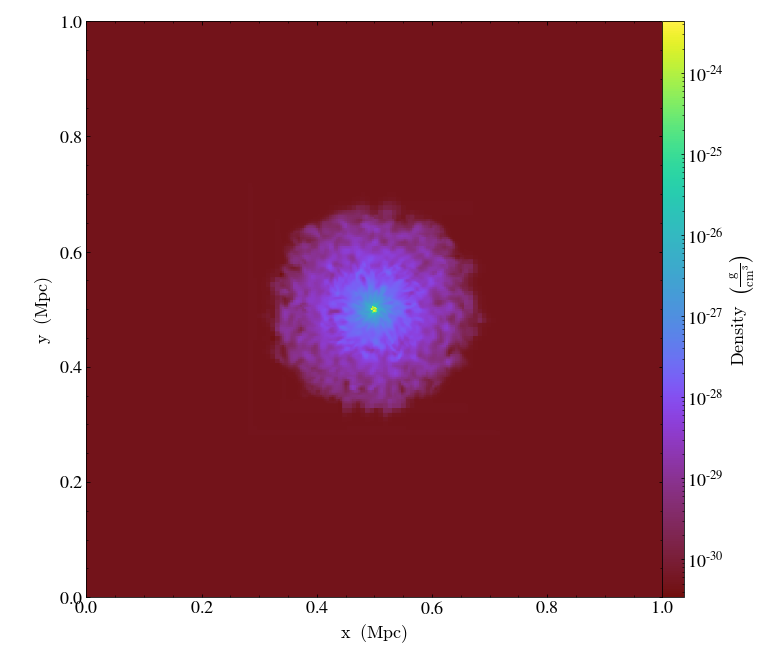

In [9]:
# finally making a plot!
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=[3,3]

# r for region, 0.5 along z is going to be 1/2 of the way through the 3rd dimension of the box
p = ds.r[:,:,0.5].plot("density") 

yt : [INFO     ] 2021-11-29 10:37:09,692 Making a fixed resolution buffer of (density) 800 by 800
yt : [INFO     ] 2021-11-29 10:37:09,714 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



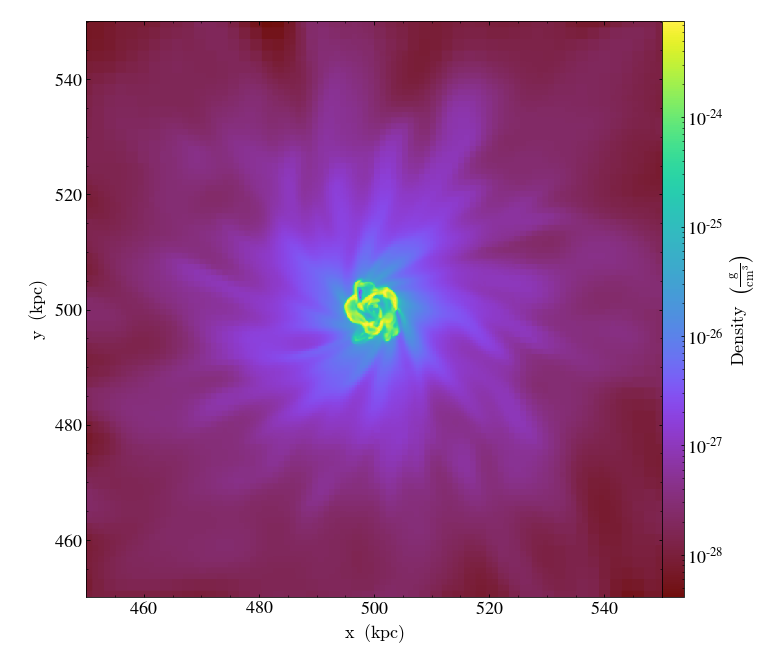

In [11]:
p.zoom(10)


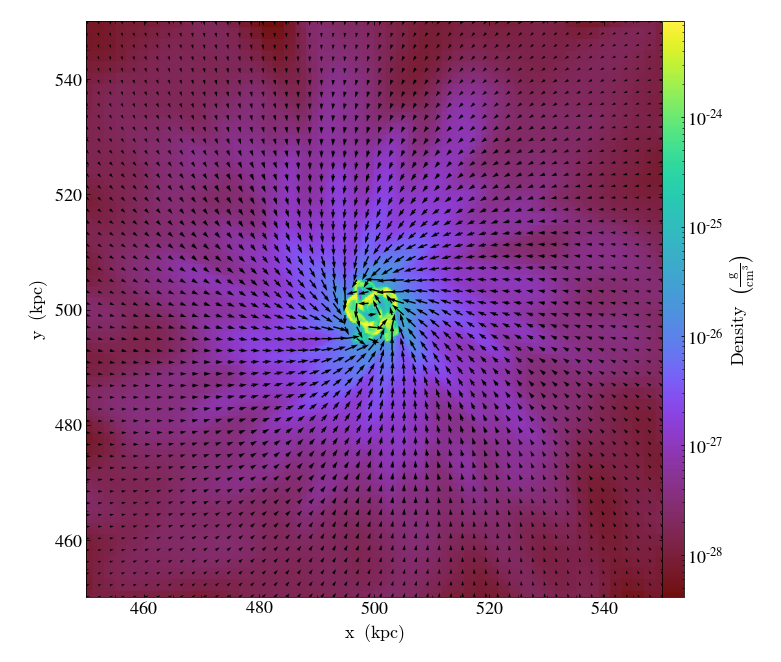

In [12]:
p.annotate_velocity()

yt : [INFO     ] 2021-11-29 10:40:04,496 Projection completed
yt : [INFO     ] 2021-11-29 10:40:04,498 xlim = 0.000000 1.000000
yt : [INFO     ] 2021-11-29 10:40:04,499 ylim = 0.000000 1.000000
yt : [INFO     ] 2021-11-29 10:40:04,499 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



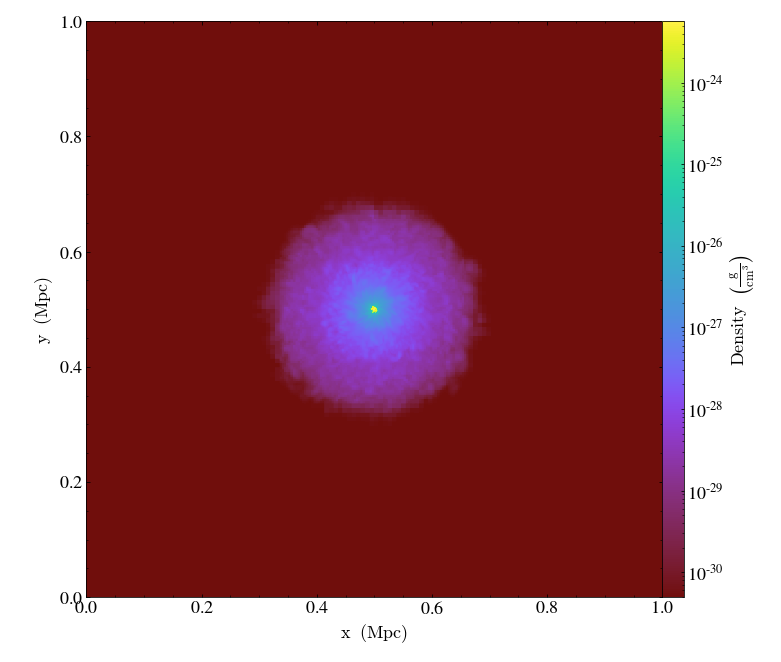

In [14]:
p2 = ds.r[:].max("density",axis="z").plot()
# take the full region (r[:])
# and grab the maximum densit along the z-axis 
# plot this max density


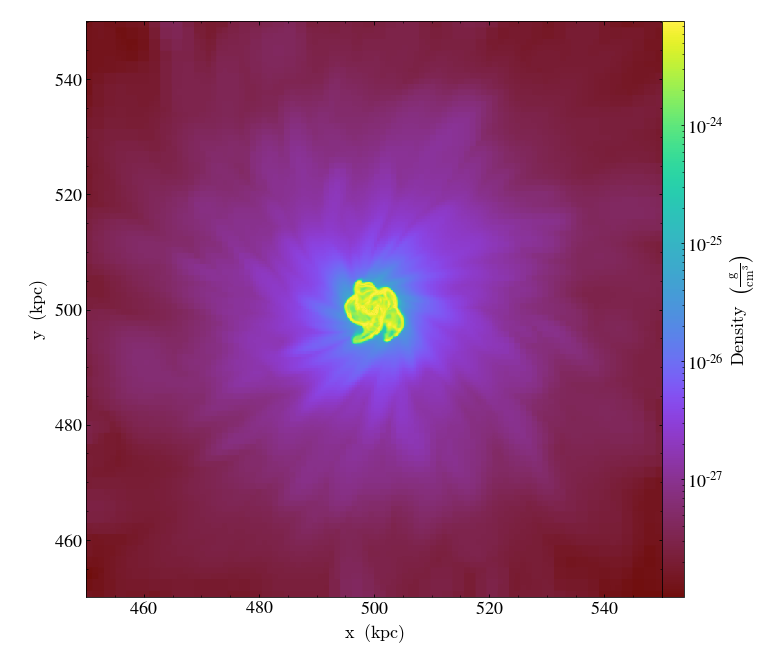

In [15]:
p2.zoom(10)

yt : [INFO     ] 2021-11-29 10:42:13,998 Projection completed
yt : [INFO     ] 2021-11-29 10:42:14,000 xlim = 0.100000 0.900000
yt : [INFO     ] 2021-11-29 10:42:14,000 ylim = 0.100000 0.900000
yt : [INFO     ] 2021-11-29 10:42:14,001 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



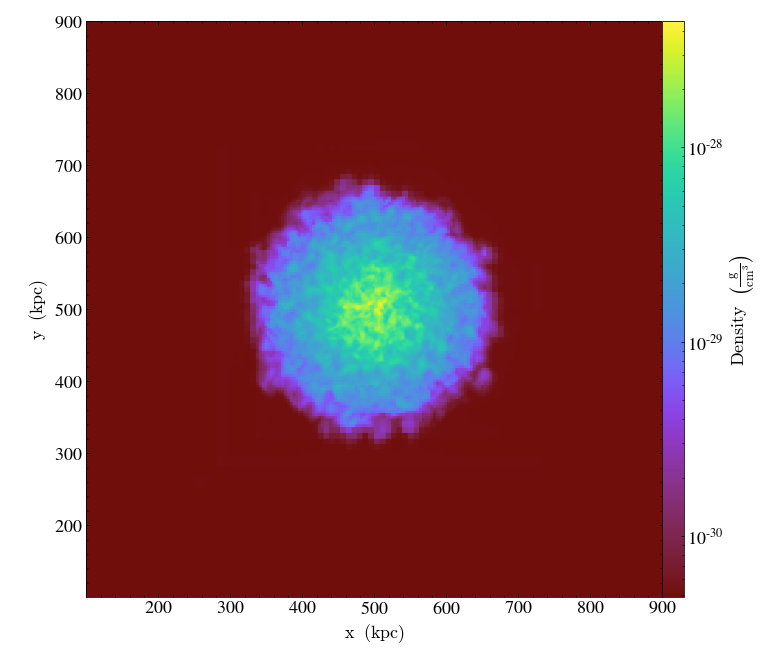

In [19]:
p3 = ds.r[0.1:0.9, 0.1:0.9, 0.55:0.65].max("density",axis="z").plot()

yt : [INFO     ] 2021-11-29 10:43:07,323 Projection completed
yt : [INFO     ] 2021-11-29 10:43:07,324 xlim = 0.100000 0.900000
yt : [INFO     ] 2021-11-29 10:43:07,325 ylim = 0.100000 0.900000
yt : [INFO     ] 2021-11-29 10:43:07,326 Making a fixed resolution buffer of (('gas', 'temperature')) 800 by 800



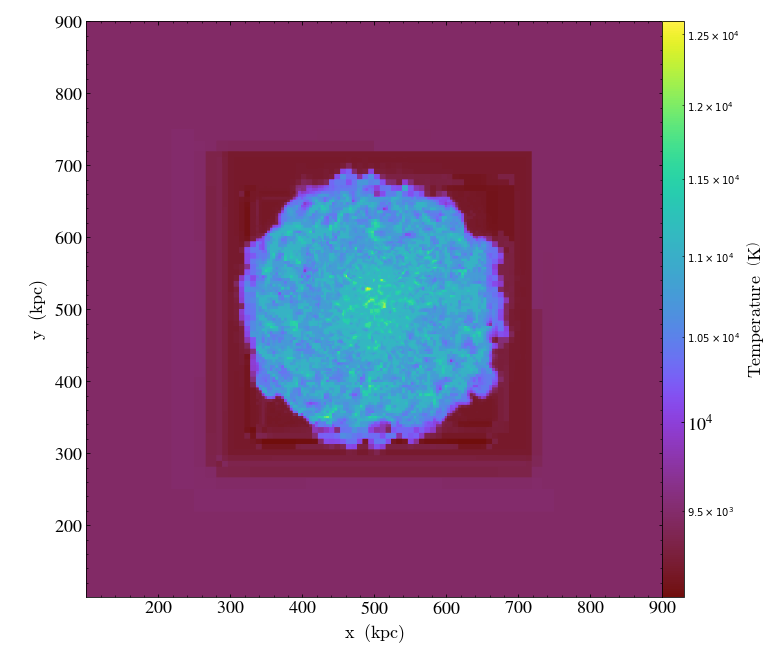

In [20]:
p3 = ds.r[0.1:0.9, 0.1:0.9, 0.55:0.65].max("temperature",axis="z").plot()


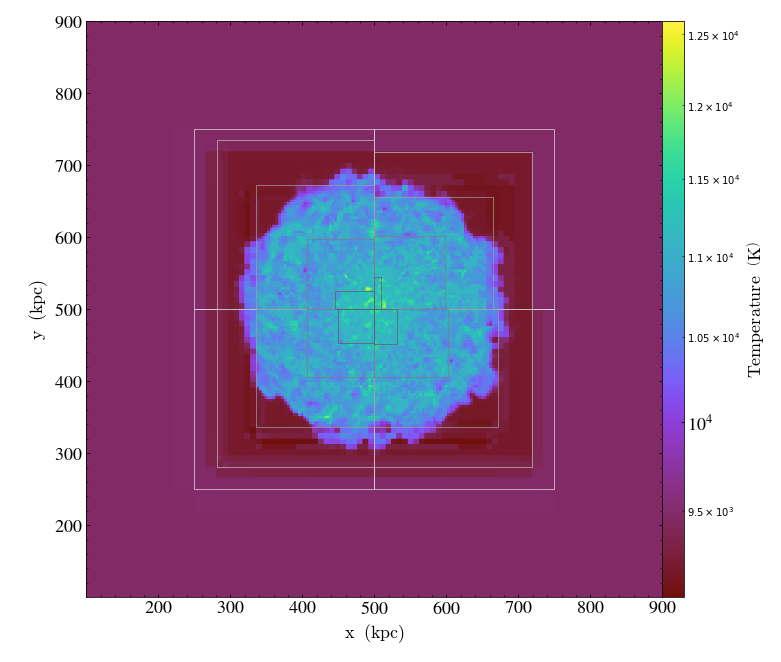

In [21]:
p3.annotate_grids()


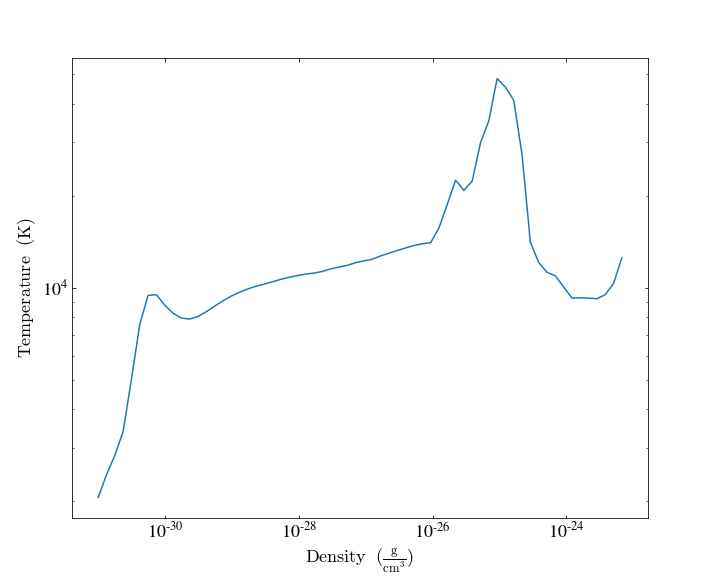

In [22]:
ds.r[:].profile("density","temperature").plot()

## Brain scan data (i.e. loading your own 3D datasets)